### What is a visual argument?

All design choices impact how a viewer will understand a data visualization. Even the simplest visualizations have an argument, a thesis, or a central point — and the design choices we make (or ignore) can have a positive or negative effect on getting that point across.

For the goal of creating more readable and understandable visualizations, there are some simple, effective tools at our disposal in matplotlib. Here are 6 strategies we’ll learn for making a strong, clear visual argument:

-   choose the right chart
-   use subplots to compare multiple graphs
-   remove distracting lines (i.e., chartjunk)
-   use color for emphasis
-   add annotations to the graph
-   present the graph with context

In this lesson, we’ll work with a dataset that catalogs trees around the Tapajós River, a tributary of the Amazon River that runs through the Amazon Rainforest. Some preliminary data manipulation has been done for you to aggregate and organize the data for our purposes. (This is a crucial step in most data visualization processes, and a great reason to become familiar with the  `pandas`  library! You can check out the other notebook in this folder if you want to see how we organized the data using  `pandas`.) Use the Jupyter notebook to the right to explore the data, and then we’ll dive into making some visualizations in the next exercise!


### Choose the right chart for the data

Charts and data visualizations help us to make sense of the world around us. They are most helpful when we can connect what we see on the page or screen to our everyday understanding of the world.

We can make that connection easier by picking a chart that, whenever possible, leans on the audience’s real-world interaction with the data. For example, consider whether your data is better suited to a horizontal or vertical presentation. Simply changing the orientation of a chart can have a big impact on its readability – check out this example with two boxplots:

A boxplot of finishing times for a half-marathon makes most sense as a horizontal box plot, since linear time is often visualized horizontally from left to right (and distance is a “horizontal” measure).

A box plot of women’s heights, on the other hand, makes sense visualized as a vertical box plot, since we measure standing height as a vertical measure.

No matter the type of chart, this simple choice can help to start the viewer off on the right foot.

In the Jupyter notebook, we’re going to visualize the average tree heights of the five most common plant families in our dataset. We’ll visualize both the  `crown_base`  height (the trunk) and the  `depth_crown`  (the leafy part). What do you think will be the clearest way to communicate that visually?

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# display charts correctly
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 3)
plt.rcParams['figure.dpi'] = 75

In [3]:
avg_heights = pd.read_csv('average_heights.csv')
avg_heights

,family,trunk,leaves,total_height
0,Fabaceae,8.250478,7.203633,15.450287
1,Urticaceae,9.109798,4.146398,13.251297
2,Salicaceae,6.042415,4.763158,10.805263
3,Annonaceae,7.748108,5.525405,13.270811
4,Boraginaceae,10.992045,4.327841,15.323295


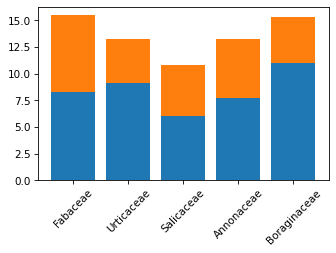

In [4]:
## YOUR SOLUTION HERE ##
plt.bar(avg_heights.family,avg_heights.trunk)
plt.bar(avg_heights.family,avg_heights.leaves,bottom=avg_heights.trunk 
plt.tick_params(axis='x',labelrotation=45)
plt.show()


### Use subplots to compare multiple charts

Not only can subplots help us fit graphs nicely onto a page, the arrangement of graphs in a subplot can  _also_  be used as a tool to make a clearer visual argument.

-   **Side-by-side**  charts allow us to quickly compare y-axis (vertical) changes. This is often the best presentation for direct comparisons of similar charts, especially when the x-axis is consistent.
    
-   **Stacked**  charts allow for easy comparison of changes on the x-axis (horizontal).
    
-   A  **tiled grid**  creates a setup known as “small multiples”. This is ideal for showing a pattern between multiple visualizations, or emphasizing one visualization in the context of others.
    

With any setup, we should  **keep the scale and axis-bounds the same whenever possible**  so that the graphs can be compared directly. If that’s not possible, we need to make sure the viewer knows what’s being changed between each graph. Graphs can become  **confusing or even misleading**  if the scale, axes, or units are changed without explicit notice. Titles, annotations, or axis-labels are good places to put this information.

To make these subplot arrangements, we use the  `plt.subplot()`  function, which takes parameters for  `row`,  `column`, and  `index`  (i.e. position in the grid). For example, the code below makes a grid with 4 rows and 2 columns (so, 8 squares), and will “select” the sixth square in the grid:

```

```

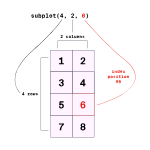

Let’s put some of these to work on our dataset now. Again, we’ll load the tree inventory dataset, and subsets of relevant information. This time, the trees are subsetted by forest type:  `PF`  (primary forest),  `SF`  (secondary forest), and  `SLF`  (selectively logged forest). We’ll use multiple vertical bar charts to compare the counts of the most common trees in each forest type. Our goal for the next few visualizations is to  **better understand biodiversity in the three different types of forest**.

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd

# load data
PF_data = pd.read_csv('PF_genus_counts.csv')
SF_data = pd.read_csv('SF_genus_counts.csv')
SLF_data = pd.read_csv('SLF_genus_counts.csv')
PF_data.head()

This time, our tree data is subsetted by forest type: `PF` (primary forest), `SF` (secondary forest), and `SLF` (selectively logged forest). We’ll use multiple vertical bar charts to compare the counts of the most common trees in each forest type. Our goal for the next few visualizations is to **better understand biodiversity in the three different types of forest**.


1. Run the Setup cells above to load our data, and take a few minutes to look at the subsets. Then, make 3 subplots in a 3-row by 1-column grid. Make a barplot in each subplot, plotting `genus` on the x-axis and `counts` on the y-axis for each. Add an `xlabel` to each x-axis so we can keep track of which graph represents which forest. 

In [ ]:
## YOUR SOLUTION HERE ##

plt.figure(figsize=(10, 5))  # we'll learn how to do this later in this lesson
plt.subplot(3,1,1)
plt.bar(PF_data.genus,PF_data.counts)
plt.xlabel("Primary Forest")
plt.subplot(3,1,2)
plt.bar(SF_data.genus,SF_data.counts)
plt.xlabel('Secondary Forest')
plt.subplot(3,1,3)
plt.bar(SLF_data.genus,SLF_data.counts)
plt.xlabel('Selectively Logged Forest')
plt.show()

<details>
    <summary style="display:list-item; font-size:16px; color:blue;"><i>Woah there! What do you notice? What could you say about the scales? The colors? The axis labels? We'll improve these graphs in the next few steps.</i></summary> Both the x-scale and y-scale are unstandardized -- in other words, different on the different graphs. The x-labels are totally unreadable, and the color doesn't mean anything at this point. </summary>

2. Okay, that's looking pretty hard to read right now -- we'll work on fixing up this graph throughout this exercise and the next one. To start, let's standardize the y-axes. The counts in the Secondary Forest graph are near 100, while the other two reach only to about 70. Change the y-axes range to `(0,105)` for each graph using `plt.ylim()`.

In [ ]:
## YOUR SOLUTION HERE ##

plt.figure(figsize=(10, 5))  # we'll learn how to do this later in this lesson
plt.subplot(3,1,1)
plt.bar(PF_data.genus,PF_data.counts)
plt.ylim(0,105)
plt.xlabel("Primary Forest")
plt.subplot(3,1,2)
plt.ylim(0,105)
plt.bar(SF_data.genus,SF_data.counts)
plt.xlabel('Secondary Forest')
plt.subplot(3,1,3)
plt.bar(SLF_data.genus,SLF_data.counts)
plt.ylim(0,105)
plt.xlabel('Selectively Logged Forest')
plt.show()

3. Looking better already! But do you notice that the bars are _slightly_ wider in the middle graph? Let's standardize the x-axis too, by setting the `xlim` to `(-3, 100)` to give a cushion on either side of the graph.

In [ ]:
## YOUR SOLUTION HERE ##
plt.figure(figsize=(10, 5))  # we'll learn how to do this later in this lesson
plt.figure(figsize=(10, 5))  # we'll learn how to do this later in this lesson
plt.subplot(3,1,1)
plt.bar(PF_data.genus,PF_data.counts)
plt.xlim(-3,105)
plt.ylim(0,105)
plt.xlabel("Primary Forest")
plt.subplot(3,1,2)
plt.bar(SF_data.genus,SF_data.counts)
plt.xlim(-3,105)
plt.ylim(0,105)
plt.xlabel('Secondary Forest')
plt.subplot(3,1,3)
plt.bar(SLF_data.genus,SLF_data.counts)
plt.xlim(-3,105)
plt.ylim(0,105)
plt.xlabel('Selectively Logged Forest')
plt.show()

4. Now we have a real visual comparison going -- the number of trees in the top genuses are clearly higher in Secondary Forests, but it looks like Primary and Selectively Logged Forests have _more species_ of trees. Let's clean it up a little more by rotating the labels. Recall that we can use matplotlib's general function `plt.xticks()`, and pass in arguments for horizontal alignment, `ha`, and `rotation`. Set the horizontal alignment equal to `"left"` and the rotation equal to `-45` degrees.

In [ ]:
## YOUR SOLUTION HERE ##

plt.figure(figsize=(12, 5))  # we'll learn how to do this later in this lesson
plt.subplot(3,1,1)
plt.bar(PF_data.genus, PF_data.counts)
plt.xlabel('Primary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(ha="left", rotation=-45)
plt.subplot(3,1,2)
plt.bar(SF_data.genus, SF_data.counts)
plt.xlabel('Secondary Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(ha="left", rotation=-45)
plt.subplot(3,1,3)
plt.bar(SLF_data.genus, SLF_data.counts)
plt.xlabel('Selectively Logged Forest')
plt.ylim((0,105))
plt.xlim((-3,105))
plt.xticks(ha="left", rotation=-45)
plt.show()

Well, that's still pretty messy! But we start to see that the _types_ of trees are different in each forest type, regardless of how many there are. Let's dig deeper and keep improving this graph and our visual argument in the next exercise. 